In [43]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import csv 
import seaborn as sn 
%matplotlib inline

In [44]:
ds= pd.read_csv("netflix price in different countries.csv")
ds.head()

,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($)
0,Argentina,4760,3154,1606,3.74,6.30,9.26
1,Austria,5640,3779,1861,9.03,14.67,20.32
2,Bolivia,4991,3155,1836,7.99,10.99,13.99
3,Bulgaria,6797,4819,1978,9.03,11.29,13.54
4,Chile,4994,3156,1838,7.07,9.91,12.74


In [45]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        65 non-null     object 
 1   Total Library Size             65 non-null     int64  
 2   No. of TV Shows                65 non-null     int64  
 3   No. of Movies                  65 non-null     int64  
 4   Cost Per Month - Basic ($)     65 non-null     float64
 5   Cost Per Month - Standard ($)  65 non-null     float64
 6   Cost Per Month - Premium ($)   65 non-null     float64
dtypes: float64(3), int64(3), object(1)
memory usage: 3.7+ KB


In [46]:
ds.tail()

,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($)
60,Ireland,6486,4515,1971,9.03,14.67,20.32
61,Switzerland,5506,3654,1852,12.88,20.46,26.96
62,Australia,6114,4050,2064,7.84,12.12,16.39
63,Denmark,4558,2978,1580,12.00,15.04,19.60
64,United States,5818,3826,1992,8.99,13.99,17.99


In [47]:
ds.loc[ds["Country"] == 'Turkey']

,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($)
41,Turkey,4639,2930,1709,1.97,3.0,4.02


In [48]:
duplicate = ds.duplicated()
print(duplicate.sum())

0


In [49]:
ds.describe().T

,count,mean,std,min,25%,50%,75%,max
Total Library Size,65.0,5314.415385,980.322633,2274.00,4948.00,5195.00,5952.00,7325.00
No. of TV Shows,65.0,3518.953846,723.010556,1675.00,3154.00,3512.00,3832.00,5234.00
No. of Movies,65.0,1795.461538,327.279748,373.00,1628.00,1841.00,1980.00,2387.00
Cost Per Month - Basic ($),65.0,8.368462,1.937819,1.97,7.99,8.99,9.03,12.88
Cost Per Month - Standard ($),65.0,11.990000,2.863979,3.00,10.71,11.49,13.54,20.46
Cost Per Month - Premium ($),65.0,15.612923,4.040672,4.02,13.54,14.45,18.06,26.96


In [50]:
ds.loc[ds["Cost Per Month - Premium ($)"]== ds["Cost Per Month - Premium ($)"].max()]

,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($)
23,Liechtenstein,3048,1712,1336,12.88,20.46,26.96
61,Switzerland,5506,3654,1852,12.88,20.46,26.96


In [51]:
ds.loc[ds["Cost Per Month - Premium ($)"]== ds["Cost Per Month - Premium ($)"].min()]

,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($)
41,Turkey,4639,2930,1709,1.97,3.0,4.02


In [52]:
ds.corr()

,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($)
Total Library Size,1.000000,0.971146,0.849957,-0.062877,-0.055200,-0.071521
No. of TV Shows,0.971146,1.000000,0.699786,-0.003814,0.002285,-0.011100
No. of Movies,0.849957,0.699786,1.000000,-0.179913,-0.170391,-0.189711
Cost Per Month - Basic ($),-0.062877,-0.003814,-0.179913,1.000000,0.898535,0.820914
Cost Per Month - Standard ($),-0.055200,0.002285,-0.170391,0.898535,1.000000,0.978768
Cost Per Month - Premium ($),-0.071521,-0.011100,-0.189711,0.820914,0.978768,1.000000


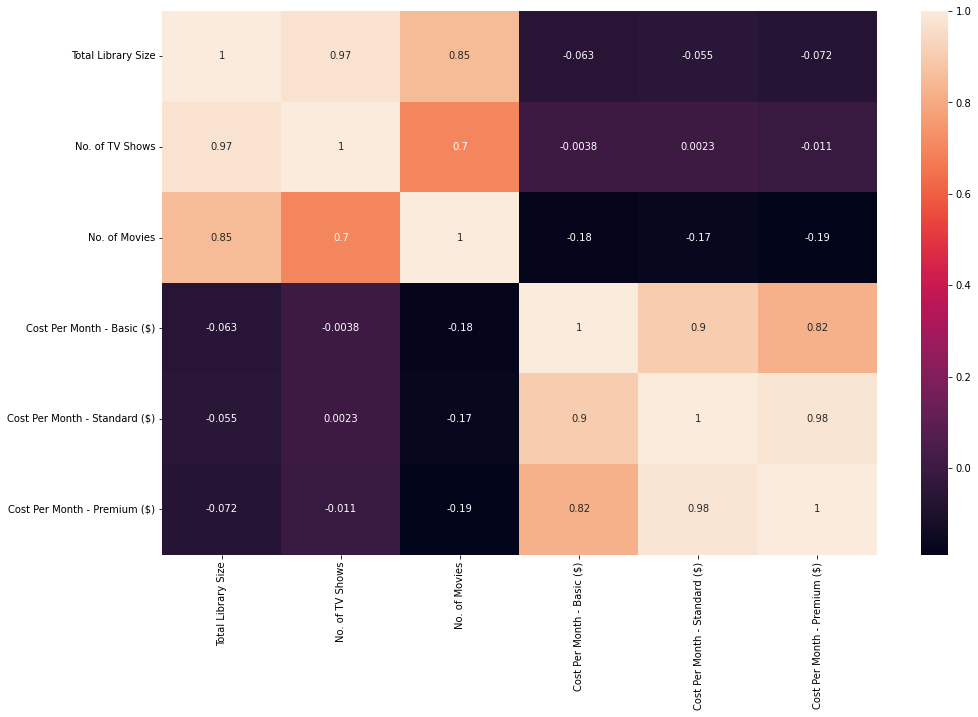

In [53]:
plt.figure(figsize=(16,10))
corrMatrix = ds.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [80]:
ds.sort_values("Cost Per Month - Standard ($)", axis = 0, ascending = True,
                 inplace = True, na_position ='last')
ds[-10::]

,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($)
1,Austria,5640,3779,1861,9.03,14.67,20.32
60,Ireland,6486,4515,1971,9.03,14.67,20.32
12,Germany,5668,3814,1854,9.03,14.67,20.32
13,Gibraltar,6167,4079,2088,9.03,14.67,20.32
63,Denmark,4558,2978,1580,12.00,15.04,19.60
20,Israel,5713,3650,2063,10.56,15.05,19.54
11,France,5445,3604,1841,10.16,15.24,20.32
45,Belgium,4990,3374,1616,10.16,15.24,20.32
23,Liechtenstein,3048,1712,1336,12.88,20.46,26.96
61,Switzerland,5506,3654,1852,12.88,20.46,26.96


In [54]:
ds.sort_values("Cost Per Month - Standard ($)", axis = 0, ascending = True,
                 inplace = True, na_position ='last')
ds[0:10]

,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($)
41,Turkey,4639,2930,1709,1.97,3.00,4.02
0,Argentina,4760,3154,1606,3.74,6.30,9.26
19,India,5843,3718,2125,2.64,6.61,8.60
5,Colombia,4991,3156,1835,4.31,6.86,9.93
59,Brazil,4972,3162,1810,4.61,7.11,9.96
42,Ukraine,5336,3261,2075,5.64,8.46,11.29
30,Peru,4986,3155,1831,6.11,8.56,11.01
31,Philippines,6362,4154,2208,7.35,9.14,10.93
4,Chile,4994,3156,1838,7.07,9.91,12.74
17,Hong Kong,4746,2883,1863,8.08,10.00,11.93


<AxesSubplot:xlabel='Country', ylabel='Cost Per Month - Standard ($)'>

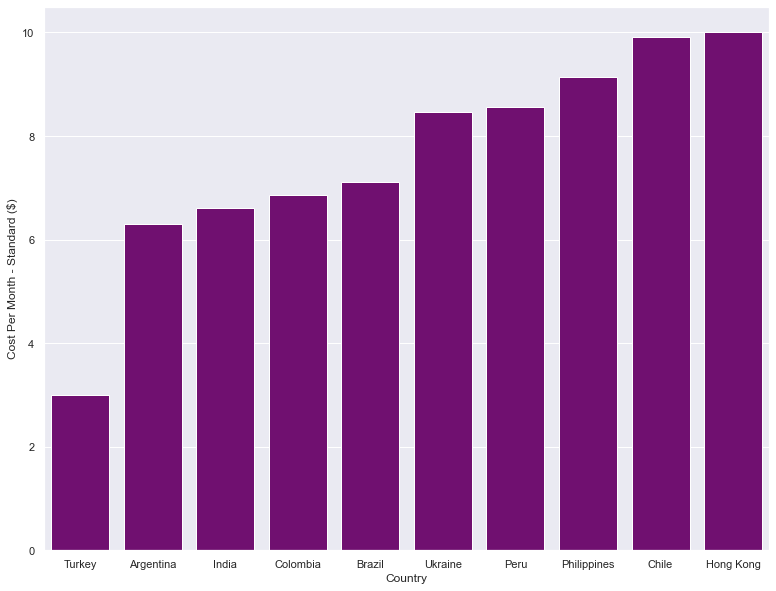

In [82]:
ds.sort_values("Cost Per Month - Standard ($)", axis = 0, ascending = True,
                 inplace = True, na_position ='last')
ds_min= ds[0:10]
sn.set(rc={'figure.figsize':(13, 10)})
sn.barplot(data=ds_min, x="Country", y="Cost Per Month - Standard ($)",color = 'purple')

<AxesSubplot:xlabel='Country', ylabel='Cost Per Month - Standard ($)'>

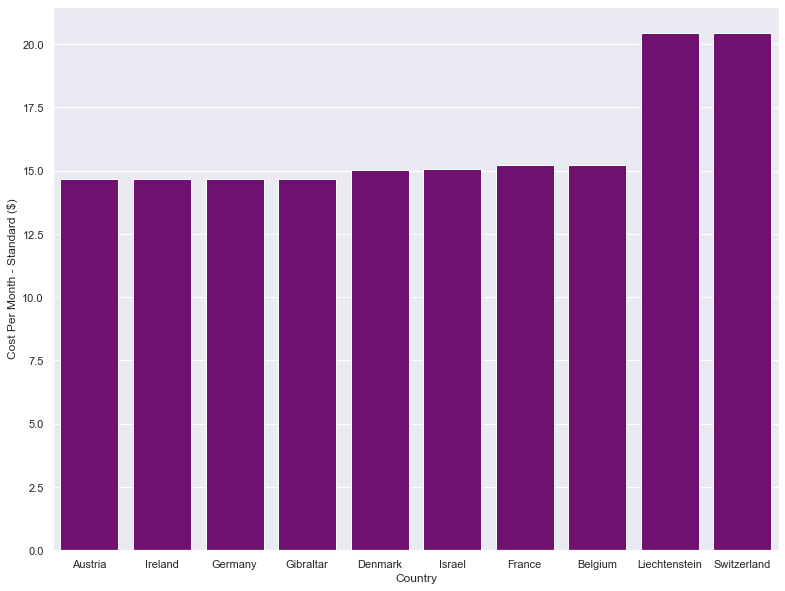

In [81]:
ds.sort_values("Cost Per Month - Standard ($)", axis = 0, ascending = True,
                 inplace = True, na_position ='last')
ds_min= ds[-10::]
sn.set(rc={'figure.figsize':(13, 10)})
sn.barplot(data=ds_min, x="Country", y="Cost Per Month - Standard ($)",color = 'purple')